In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
file_path = "AESO Pool Price - Date Range, Aggregated Daily.csv"
df = pd.read_csv(file_path)
# Remove the second row (index 1)
df.drop(index=1, inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8817 entries, 0 to 8817
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   begin_datetime_mpt  8816 non-null   object
 1   pool_price          8817 non-null   object
 2   pool_price.1        8817 non-null   object
 3   pool_price.2        8817 non-null   object
dtypes: object(4)
memory usage: 344.4+ KB


In [65]:
df.describe()

,begin_datetime_mpt,pool_price,pool_price.1,pool_price.2
count,8816,8817,8817,8817
unique,8816,3629,7050,8675
top,2000-01-02,0.0,999.99,25.984583333333333
freq,1,79,73,3


In [66]:
# Rename columns
df.rename(columns={"begin_datetime_mpt": "date", "pool_price": "min price", "pool_price.1": "max price", "pool_price.2": "mean price"}, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8817 entries, 0 to 8817
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        8816 non-null   object
 1   min price   8817 non-null   object
 2   max price   8817 non-null   object
 3   mean price  8817 non-null   object
dtypes: object(4)
memory usage: 344.4+ KB


In [68]:
# Clean the "mean price" column by removing non-numeric entries
df["min price"] = pd.to_numeric(df["min price"], errors="coerce")
df["max price"] = pd.to_numeric(df["max price"], errors="coerce")
df["mean price"] = pd.to_numeric(df["mean price"], errors="coerce")


# Convert the column to float
df["min price"] = df["min price"].astype(float)
df["max price"] = df["max price"].astype(float)
df["mean price"] = df["mean price"].astype(float)

In [69]:
df.describe()

,min price,max price,mean price
count,8816.000000,8816.000000,8816.000000
mean,24.519154,201.182205,69.788917
std,19.792910,244.655790,78.165760
min,0.000000,8.720000,5.612917
25%,12.127500,42.447500,28.832396
50%,18.570000,86.410000,43.002917
75%,30.230000,251.285000,75.934687
max,554.730000,1000.000000,761.718333


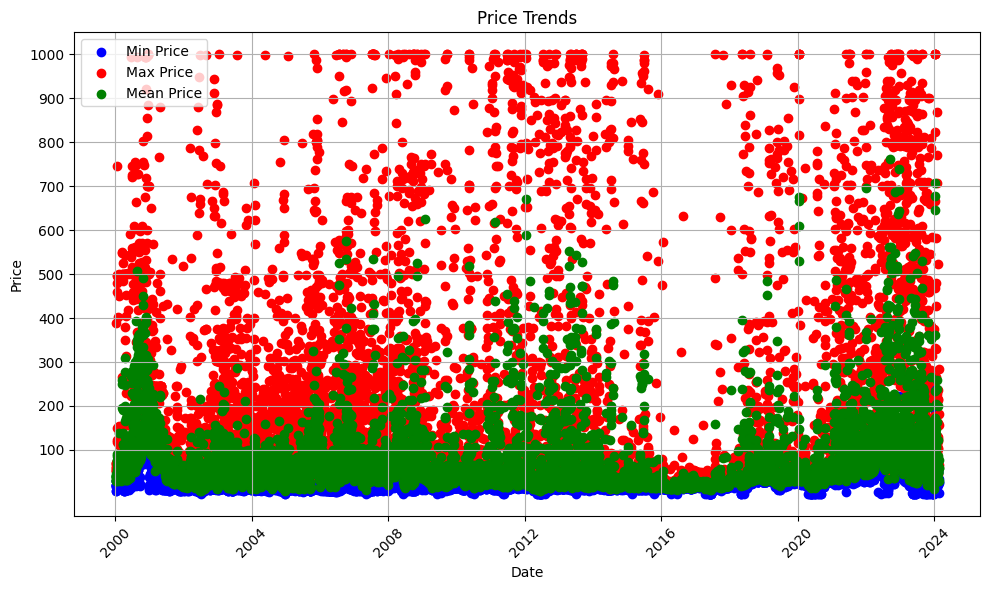

In [72]:
# Convert the "date" column to datetime format
df["dates"] = pd.to_datetime(df["date"])

# Extract relevant columns
dates = df["dates"]
min_prices = df["min price"].round(2)
max_prices = df["max price"].round(2)
mean_prices = df["mean price"].round(2)

# Create a boolean mask for values greater than 1000
mask = df["max price"] > 1000

# Replace values greater than 1000 with NaN
df.loc[mask,"max price"] = np.nan

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, min_prices, label="Min Price", color='b')
plt.plot(dates, max_prices, label="Max Price", color='r')
plt.plot(dates, mean_prices, label="Mean Price", color='g')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Trends")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.yticks([100,200,300,400,500,600,700,800,900,1000]) 
plt.tight_layout()

# Save or display the plot
plt.savefig("price_trends.png")  # Save the plot as an image
plt.show()  # Display the plo
